In [48]:
import pandas as pd
import numpy as np
import sklearn as skl
df = pd.read_csv('/content/drive/MyDrive/mushroom edibility classification dataset.csv')
df.head()


,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [49]:
#preprossing removing null value
df= df.dropna(axis=0, subset=["cap-shape","cap-color"])

In [50]:
#Endcoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['class'] = enc.fit_transform(df['class'])
df['bruises'] = enc.fit_transform(df['bruises'])
df.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,5.0,2,4.0,0,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,0,5.0,2,9.0,0,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,0,0.0,2,8.0,0,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,1,5.0,3,8.0,0,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,0,5.0,2,3.0,1,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [51]:
#LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

terget = df["class"].values   
dataset = df.drop(["class"], axis=1).values

In [52]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(dataset, terget, test_size=0.2, random_state=42)
x_train.shape

(2486, 19)

In [53]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions
np.sum(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


56

In [54]:
print("Accuracy using logistic regression: {}%".format(round(accuracy_score(y_test, predictions)*100,2)) )


Accuracy using logistic regression: 95.66%


In [55]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset,terget,test_size=0.2,random_state=1)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score=accuracy_score(y_pred,y_test)

print(y_pred)

print(np.sum(y_pred))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [56]:
print("Accuracy using Decision Tree: {}%".format(round(score*100,2)) )

Accuracy using Decision Tree: 100.0%


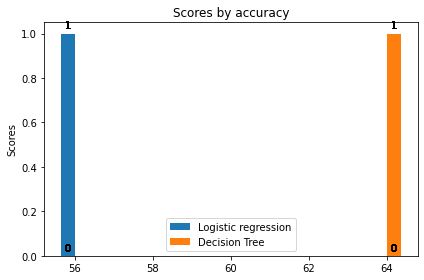

In [57]:
#Comparing the accuracy and plot them as a bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
LogisRegPred = predictions
DecisionTreePred = y_pred

# x = np.arange(len(labels))  # the label locations
LenOFLogisRegPred = np.sum(predictions)
LenOFDecisionTree = np.sum(y_pred)
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(LenOFLogisRegPred - width/2, LogisRegPred, width, label='Logistic regression')
rects2 = ax.bar(LenOFDecisionTree + width/2, DecisionTreePred, width, label='Decision Tree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by accuracy')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
